In [1]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\User\AppData\Local\Temp\ipykernel_16548\1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('./OptionMetrics/options2223.csv', nrows=10_000)

In [3]:
sample = data[(data['secid']==100219) & (data['date']=='2022-01-03') & (data['exdate'] =='2022-02-18') & (data['cp_flag']=='C')]

In [4]:
forwards = pd.read_csv('./OptionMetrics/forwards2223.csv')

In [5]:
forwards[(forwards['secid']==100219) & (forwards['date']=='2022-01-03') & (forwards['expiration'] == '2022-02-18')]

,secid,date,expiration,ForwardPrice,ticker
10630,100219,2022-01-03,2022-02-18,2662.556214,RUI
10631,100219,2022-01-03,2022-02-18,2662.516513,RUI


In [6]:
securities = pd.read_csv('./OptionMetrics/securities2223.csv', nrows=10_000)

In [7]:
securities[(securities['secid']==100219) & (securities['date']=='2022-01-03')]

,secid,date,ticker,sic,index_flag,exchange_d,low,high,open,close,volume
6953,100219,2022-01-03,RUI,9999.0,1,32768,2640.25,2660.95,2645.68,2660.78,0


In [8]:
rates = pd.read_csv('./OptionMetrics/rates2223.csv', nrows=10_000)

In [9]:
rates.head()

,date,days,rate
0,2022-01-03,10,0.518382
1,2022-01-03,30,0.524269
2,2022-01-03,60,0.534101
3,2022-01-03,91,0.545490
4,2022-01-03,122,0.558093


In [10]:
rates[(rates['date'] == '2022-01-03') & (rates['days']==10)]['rate'][0] / 100

0.0051838200000000004

In [11]:
import pipeline
import importlib
importlib.reload(pipeline)
R = 0.000524269 # Rate for 30 day
S = 2640.25  # We take low price to avoid impl vol calc issues
processed = sample[['strike_price', 'best_bid', 'best_offer']]
processed['strike_price'] = processed['strike_price'] / 1000
T = 45 / 365
R = R / T
processed[['best_offer', 'best_bid']] = processed[['best_offer', 'best_bid']] / 1
processed['vol_high'] = processed.apply(lambda x: pipeline.implied_vol(x['best_offer'], S, x['strike_price'], T, R), axis=1)
processed['vol_low'] = processed.apply(lambda x: pipeline.implied_vol(x['best_bid'], S, x['strike_price'], T, R), axis=1)
processed['vol_mid'] = (processed['vol_high'] + processed['vol_low']) / 2

C:\Users\User\AppData\Local\Temp\ipykernel_16548\3475638486.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed['strike_price'] = processed['strike_price'] / 1000
C:\Users\User\AppData\Local\Temp\ipykernel_16548\3475638486.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed[['best_offer', 'best_bid']] = processed[['best_offer', 'best_bid']] / 1
C:\Users\User\AppData\Local\Temp\ipykernel_16548\3475638486.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [12]:
display(processed)

,strike_price,best_bid,best_offer,vol_high,vol_low,vol_mid
238,1850.0,794.0,818.0,0.775761,0.493291,0.634526
239,1875.0,769.0,793.0,0.752654,0.476636,0.614645
240,1900.0,744.0,768.0,0.729776,0.460171,0.594974
241,1925.0,719.5,743.5,0.710700,0.455716,0.583208
242,1950.0,694.5,718.5,0.688172,0.439308,0.563740
...,...,...,...,...,...,...
359,3300.0,0.0,10.0,0.400210,0.097998,0.249104
360,3325.0,0.0,10.0,0.410560,0.101129,0.255845
361,3350.0,0.0,10.0,0.420774,0.104221,0.262498
362,3375.0,0.0,10.0,0.430856,0.107275,0.269065


In [13]:

import matplotlib.pyplot as plt
import numpy as np

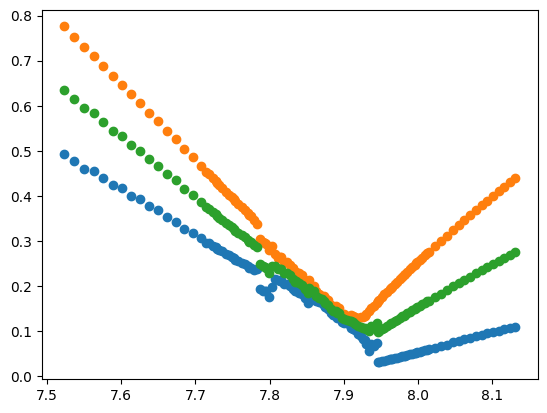

In [14]:
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_low'])
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_high'])
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_mid'])

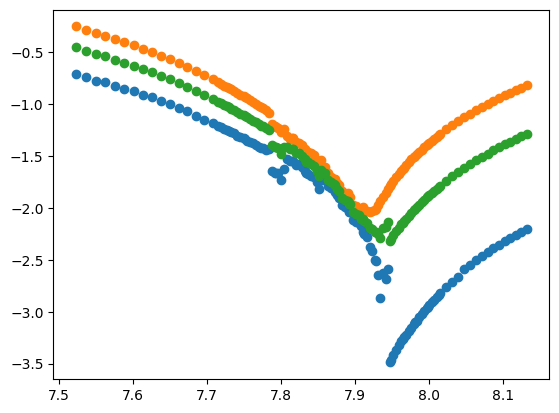

In [15]:
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_low'].apply(np.log))
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_high'].apply(np.log))
plt.scatter(processed['strike_price'].apply(np.log), processed['vol_mid'].apply(np.log))

0.1232876712328767
torch.Size([126])
torch.Size([126])
Mid shape torch.Size([126])
tensor([0.7013, 0.8550, 0.9882, 1.1057, 1.2108])
tensor(1.2445)
torch.Size([126]) torch.Size([381, 1])
torch.Size([1, 381])
Epoch: 0
Arb loss tensor(0.0004, grad_fn=<MulBackward0>)
Total loss tensor(0.0004, grad_fn=<AddBackward0>)
Arb loss tensor(0.0003, grad_fn=<MulBackward0>)
Total loss tensor(0.0003, grad_fn=<AddBackward0>)
Arb loss tensor(0.0002, grad_fn=<MulBackward0>)
Total loss tensor(0.0002, grad_fn=<AddBackward0>)
Arb loss tensor(5.1525e-05, grad_fn=<MulBackward0>)
Total loss tensor(5.1525e-05, grad_fn=<AddBackward0>)
Arb loss tensor(-0., grad_fn=<MulBackward0>)
Total loss tensor(-0., grad_fn=<AddBackward0>)
With remaining arb: -0.0 over 4 epochs
tensor([[ 1.0038, -0.0011,  0.0204,  0.0267,  0.0253]])
Bound Loss 397.79644981160806
[(tensor(0.8751), 8.24448098241358e-05), (tensor(0.8794), 0.00020489663628114278), (tensor(0.8836), 0.0003354532297435353), (tensor(0.8857), 0.0004938665828019446), (t

KeyboardInterrupt: 

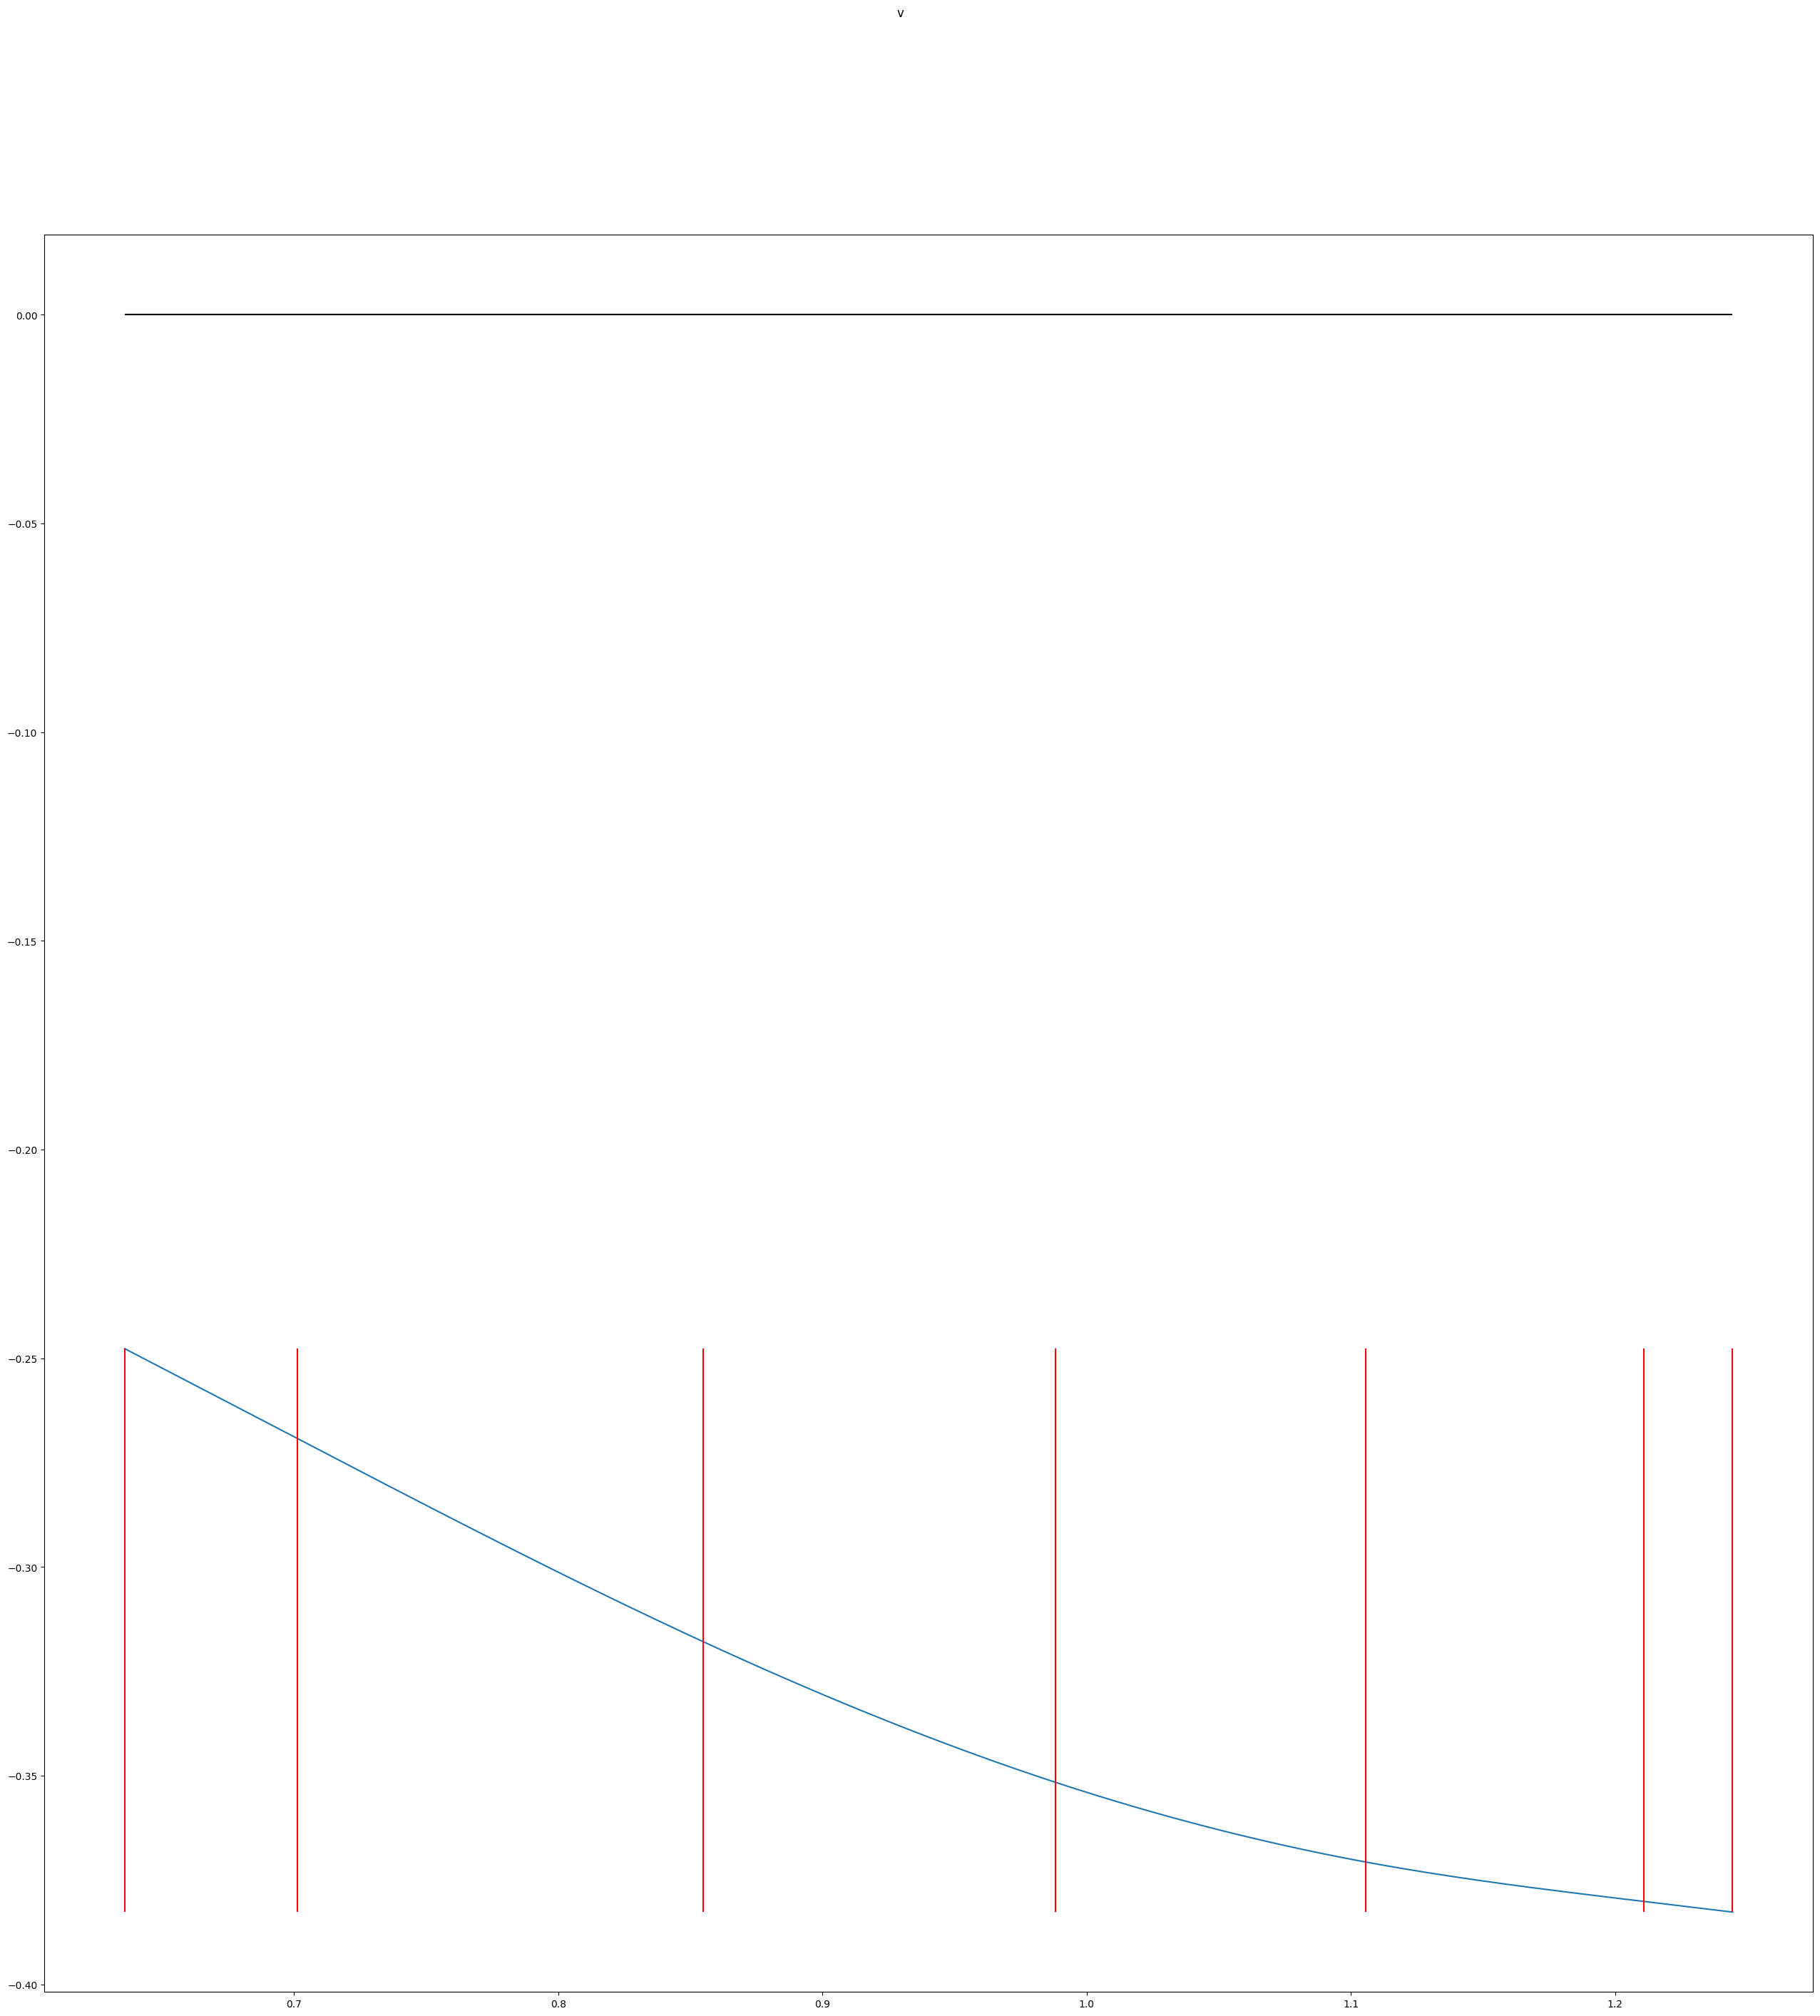

In [128]:
import smilecorrector_qr_exp as smilenet
import torch
importlib.reload(smilenet)
# For first try, we pass our boundaries as each strike price
# boundaries = processed['strike_price'].apply(np.log).to_numpy()
# ind = np.array([i for i in range(0,boundaries.shape[0],3)])
# boundaries = boundaries[ind]
# strikes = boundaries.copy()
S = 2640.25 # We take low price to avoid impl vol calc issues
T = 45 / 365
R = 0.000524269 # Rate for 30 day - Question on unit / order of magnitude
F = 2662.556214
print(T)
log_strikes = torch.tensor((processed['strike_price'].apply(np.log).to_numpy()- np.log(F)) + 1) #   
S = torch.tensor(S).reshape(1,1)
T = torch.tensor(T).reshape(1,1)
R = torch.tensor(R).reshape(1,1)
mids = torch.tensor(((processed['vol_high'].to_numpy()**2 + processed['vol_low'].to_numpy()**2) / 2))
# mids = mids * T
print(mids.shape)
mids = mids * T.item() 
print(mids.shape)
print('Mid shape', mids.shape)
his = T.item() * (processed['vol_high']).to_numpy().reshape(-1,1)**2
los = T.item() * (processed['vol_low']).to_numpy().reshape(-1,1)**2
# datum, log_strikes = pipeline.get_datum('2022-0')
model = smilenet.SmileNet(5, log_strikes, mids)
datum = torch.tensor(np.vstack([ T.item()  * (processed['vol_high']).to_numpy().reshape(-1,1)**2 , T.item()  * (processed['vol_low'].to_numpy().reshape(-1,1))**2 , log_strikes.reshape(-1,1), np.log(S), T, R])).double()
print(log_strikes.shape, datum.shape)
print(datum.T.shape)
model.train(datum.T.double(), log_strikes, epochs=100)

In [ ]:

norm = smilenet.differentiableNormCdf.apply

def d_plus(k, w):
    kreal = k - 1
    return -kreal / torch.sqrt(w(k)) + torch.sqrt(w(k)) / 2
def d_sub(k,w):
    kreal = k - 1
    return -kreal / torch.sqrt(w(k)) - torch.sqrt(w(k)) / 2


def bsc_svi(k, w, S):
    kreal = k - 1
    return S * (norm(d_plus(k, w)) - torch.exp(kreal) * norm(d_sub(k, w)))

In [ ]:
from functools import partial
pred, boundaries = model.forward(datum.T.double())
ttensor = smilenet.transform(pred.detach(),1.0)
polys = [np.polynomial.polynomial.Polynomial(torch.flip((pred[:,0][4*i:4*i+4]), dims=(0,)).detach().numpy()) for i in range((pred.shape[0])//4)]
ts = [np.polynomial.polynomial.Polynomial(ttensor[i,:]) for i in range(ttensor.shape[0])]

funcs = [partial(bsc_svi, w = polys[i], S=S) for i in range(len(polys))]

boundaries = torch.hstack([torch.tensor(log_strikes[0]), boundaries.reshape(-1), torch.tensor(log_strikes[-1])])
his = torch.tensor(his).reshape(-1)
los = torch.tensor(los).reshape(-1)
print(los[0], log_strikes[0], mids[0])
print(type(mids), type(his))
ppm = [bsc_svi(log_strikes[i], lambda k, const=mids[i]: const, S) for i in range(log_strikes.reshape(-1).shape[0])]
pph = [bsc_svi(log_strikes[i], lambda k, const=his[i]: const, S) for i in range(log_strikes.reshape(-1).shape[0])]
ppl = [bsc_svi(log_strikes[i], lambda k, const=los[i]: const, S) for i in range(log_strikes.reshape(-1).shape[0])]


print(boundaries.shape)

smilenet.plot_polys(funcs, boundaries, 0, 'bs', extra_points=[(log_strikes, processed['best_offer'].to_numpy(), 'raw low'), (log_strikes, processed['best_bid'].to_numpy(), 'raw high'), (log_strikes, ppm, 'calc mid'), (log_strikes, pph, 'calc hi'),(log_strikes, ppl, 'calc lo')], labels=True)


With remaining arb: 6.205683511738887e-05 over 99 epochs


C:\Users\User\AppData\Local\Temp\ipykernel_7080\3372290018.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  boundaries = torch.hstack([torch.tensor(log_strikes[0]), boundaries.reshape(-1), torch.tensor(log_strikes[-1])])


tensor(0.0300) tensor(0.6359) tensor(0.0521)
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([9])


In [ ]:
# Play with SmileCorrect
import smilecorrector as sc
importlib.reload(sc)
control = torch.tensor(model.translate @ model.xstar).reshape(1,-1).double()
# control = torch.zeros(control.shape)
control.requires_grad_()
translate = model.translate

boundaries = model.boundaries
print(model.boundaries.shape, res1.shape)
sol, loss = sc.remove_arb(control, translate, boundaries)
print(control.shape)
print(sol.shape)
print('Loss of', loss)
loss2 = torch.sum(torch.abs(sol))
print("l1 of", loss2)

print(torch.autograd.grad(loss2, control))
polys = [np.polynomial.polynomial.Polynomial(list(reversed(sol[:,0].detach().numpy()[4*i:4*i+4]))) for i in range((sol.shape[0])//4)]
sc.plot_polys(polys, boundaries, 0, 'test')


C:\Users\User\AppData\Local\Temp\ipykernel_5392\2442275951.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  control = torch.tensor(model.translate @ model.xstar).reshape(1,-1).double()


(42,) torch.Size([164])
With remaining arb: 4.336808689942018e-11


ValueError: too many values to unpack (expected 2)

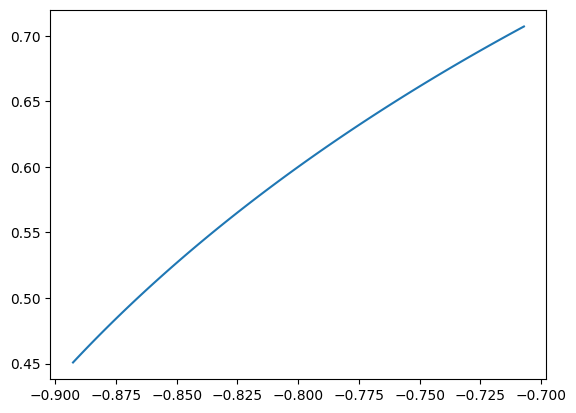

In [ ]:
import matplotlib.pyplot as plt
import torch 

a = torch.tensor([[1,2]]).T.double()
xs = []
ys = []
for i in range(100):
    a[0,0] = a[0,0] + 0.01
    q, r = torch.linalg.qr(a, mode='complete')
    xs += [q[0,1]]
    ys += [q[1,1]]
plt.plot(xs, ys)

In [ ]:
xs = torch.normal(0, torch.ones(3,1))
xs = (xs / xs.norm(dim=0)).T
print(xs.shape)
for i in xs:
    print("(%s, %s, %s)" % (i[0].item(), i[1].item(), i[2].item()))
    print(torch.linalg.norm(i))

print(xs)

torch.Size([1, 3])
(-0.8903900384902954, -0.358125239610672, -0.2809835374355316)
tensor(1.0000)
tensor([[-0.8904, -0.3581, -0.2810]])


In [ ]:
v = torch.tensor((0.3009892404079437, 0.02299308031797409, -0.9533502459526062))

In [ ]:
Q, _ = torch.linalg.qr(torch.tensor([[1,-1,0],[0,1,-1]]).T.double())

In [ ]:
print(Q)

tensor([[-0.7071, -0.4082],
        [ 0.7071, -0.4082],
        [-0.0000,  0.8165]], dtype=torch.float64)


In [ ]:
v = torch.tensor([[1,0.5,2.0],[2,3,1]]).T.double()
print(v - Q @ (Q.T @ v))

tensor([[1.1667, 2.0000],
        [1.1667, 2.0000],
        [1.1667, 2.0000]], dtype=torch.float64)


In [ ]:
import matplotlib.pyplot as plt
import torch 
import importlib
import householderqr
importlib.reload(householderqr)

a = torch.tensor([[0,2,3,4],[4,5,6,7]]).T.double()
xs = []
ys = []
zs = []
qs = []

xs0 = []
ys0 = []
zs0 = []

xs1 = []
ys1 = []
zs1 = []

xs3 = []
ys3 = []
zs3 = []

axs = []
ays = []
azs = []

for i in range(1000):
    a[0,0] = a[0,0] + 0.1
    q, r = householderqr.GSMQR(a)
    print(q)
    qs += [q[:,2]]
    xs += [q[0,2]]
    ys += [q[1,2]]
    zs += [q[2,2]]

    xs3 += [q[0,3]]
    ys3 += [q[1,3]]
    zs3 += [q[2,3]]

    xs0 += [q[0,0]]
    ys0 += [q[1,0]]
    zs0 += [q[2,0]]

    xs1 += [q[0,1]]
    ys1 += [q[1,1]]
    zs1 += [q[2,1]]

    axs += [-a[0,0] / torch.linalg.norm(a[:,0])]
    ays += [-a[1,0] / torch.linalg.norm(a[:,0])]
    azs += [-a[2,0] / torch.linalg.norm(a[:,0])]


plt.plot(xs, ys)
plt.plot(ys,zs)
plt.plot(xs,zs)


tensor([[ 0.0186,  0.9412],
        [ 0.3713,  0.2749],
        [ 0.5570,  0.0414],
        [ 0.7427, -0.1921]], dtype=torch.float64)


IndexError: index 2 is out of bounds for dimension 1 with size 2

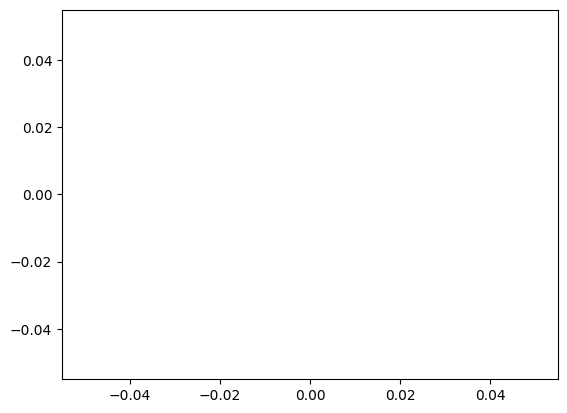

In [ ]:
plt.plot(xs3,ys3)
plt.plot(ys3,zs3)
plt.plot(xs3,zs3)


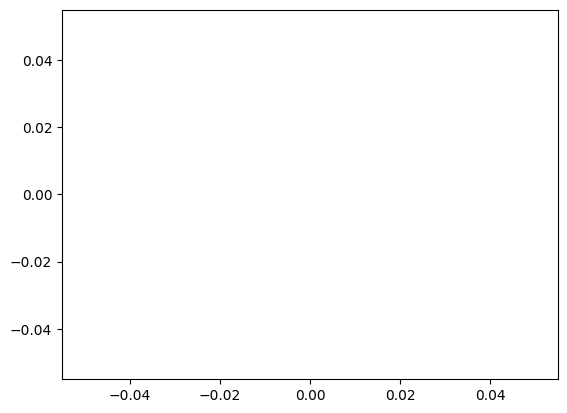

In [ ]:
plt.plot(xs0,ys0)
plt.plot(ys0,zs0)
plt.plot(xs0,zs0)


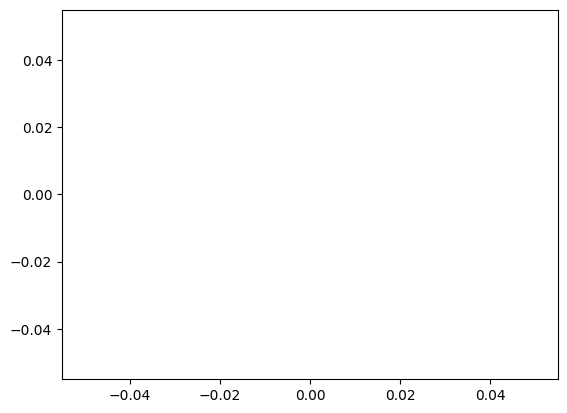

In [ ]:
plt.plot(axs,ays)
plt.plot(ays,azs)
plt.plot(axs,azs)


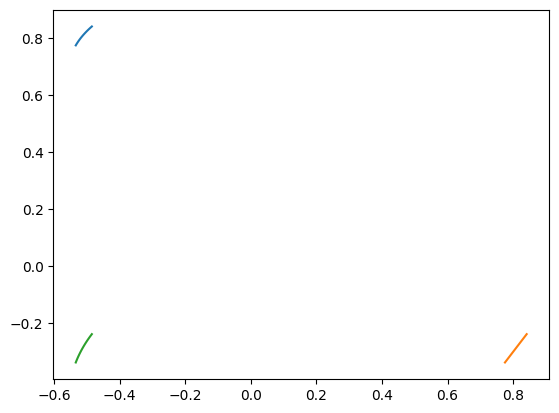

In [ ]:
plt.plot(xs1,ys1)
plt.plot(ys1,zs1)
plt.plot(xs1,zs1)


In [ ]:
for i in qs:
    print("vector((0,0,0), (%s, %s, %s))" % (i[0].item(), i[1].item(), i[2].item()))

vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,0,0), (nan, nan, nan))
vector((0,

In [ ]:
e1 = torch.tensor([1,0,0])

In [ ]:
A1 = torch.tensor([[1,2,3,4],[5,6,7,8],[0,0,0,0],[0,0,0,0]]).T.double()
A2 = A1[:,:2]
print(A1)
print(A2)
Q1, R1 = torch.linalg.qr(A1, mode='complete')
Q2, R2 = torch.linalg.qr(A2, mode='complete')
print(Q1)
print(Q2)
print(Q1 @ Q1.T)
print('\n')
print(R1)
print(R2)

tensor([[1., 5., 0., 0.],
        [2., 6., 0., 0.],
        [3., 7., 0., 0.],
        [4., 8., 0., 0.]], dtype=torch.float64)
tensor([[1., 5.],
        [2., 6.],
        [3., 7.],
        [4., 8.]], dtype=torch.float64)
tensor([[-1.8257e-01, -8.1650e-01, -4.0009e-01, -3.7407e-01],
        [-3.6515e-01, -4.0825e-01,  2.5463e-01,  7.9697e-01],
        [-5.4772e-01,  1.1144e-16,  6.9100e-01, -4.7172e-01],
        [-7.3030e-01,  4.0825e-01, -5.4554e-01,  4.8826e-02]],
       dtype=torch.float64)
tensor([[-1.8257e-01, -8.1650e-01, -4.0009e-01, -3.7407e-01],
        [-3.6515e-01, -4.0825e-01,  2.5463e-01,  7.9697e-01],
        [-5.4772e-01,  1.1144e-16,  6.9100e-01, -4.7172e-01],
        [-7.3030e-01,  4.0825e-01, -5.4554e-01,  4.8826e-02]],
       dtype=torch.float64)
tensor([[ 1.0000e+00, -4.1633e-17, -2.7756e-17, -1.1102e-16],
        [-4.1633e-17,  1.0000e+00,  5.5511e-17,  2.7756e-17],
        [-2.7756e-17,  5.5511e-17,  1.0000e+00, -3.4694e-17],
        [-1.1102e-16,  2.7756e-17, -3.46

Text(0.5, 0, 'Z Label')

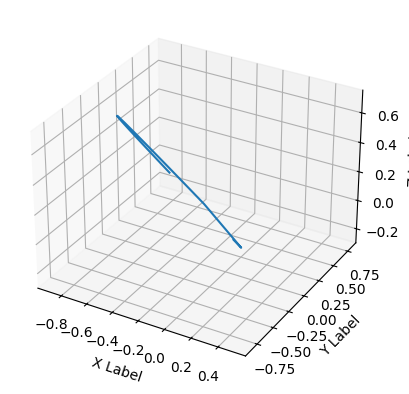

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
